<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Generative AI for Business Applications</center></font>
<center><font size=6>AI Foundations - ML- Week 1</center></font>

<center><p float="center">
  <img src="https://images.pexels.com/photos/7163956/pexels-photo-7163956.jpeg" alt="DALL-E-2025-02-27-15-47-37-An-international-outdoor-DTH-store-labeled-AUTHORIZED-DTH-OUTLET-with-a-m"width=700></a>
<center><font size=6>Health Insurance Premium Prediction</center></font>

# **Problem Statement**

## Business Context

In the current landscape of healthcare, rising costs and an increasing demand for affordable insurance have placed significant pressure on insurance providers to develop effective pricing strategies. Accurately predicting health insurance premiums is more critical than ever, as it directly impacts both customer satisfaction and the financial viability of insurance companies. Understanding the key factors that influence insurance charges—such as age, body mass index (BMI), smoking status, and other personal and demographic data—enables insurers to optimize their pricing models, ensuring they remain competitive while also being mindful of customer affordability.

As more consumers seek affordable insurance options, the need for insurers to make informed decisions based on accurate predictions has never been more urgent. By leveraging predictive analytics, insurance companies can better understand the nuances of risk pricing and develop strategies that align with market demands.

## Objective

The objective of this study is to develop a robust predictive model that estimates health insurance charges based on various personal and demographic factors. The model aims to identify and quantify the key influences on insurance pricing, thereby assisting insurers in making data-driven decisions.

This process involves collecting and preprocessing data on individuals’ demographics and insurance charges, selecting key features like age, BMI, and smoking status, and then developing a predictive model using machine learning methods (specifically, linear regression). The model's performance is evaluated using metrics such as MSE and R-squared to determine the accuracy of the model. Finally, the insights are used to segment customers by risk profiles, allowing insurers to refine their pricing and engagement strategies.

By integrating these insights into their strategic planning, insurers can enhance their overall business performance, ensuring that they remain competitive while providing affordable insurance solutions to their clients. Ultimately, this predictive modeling approach not only assists in risk assessment but also fosters a more nuanced understanding of customer needs, leading to better engagement and satisfaction.

## Data Description


The dataset consists of several key attributes:

- **Age**: Numerical value representing the age of the insured individual.
- **Sex**: Categorical variable indicating gender (male or female).
- **BMI**: Numerical value reflecting the Body Mass Index, a measure of body fat based on height and weight.
- **Children**: Numerical value representing the number of dependent children covered by the insurance policy.
- **Smoker**: Categorical variable indicating whether the individual is a smoker (yes or no).
- **Region**: Categorical variable that identifies the geographic area of the insured (southwest, southeast, northwest, northeast).
- **Charges**: Numerical value indicating the annual insurance premium (in USD) incurred by the policyholder.

This dataset contains a diverse range of cases, facilitating the modeling of different demographic and health profiles to predict insurance charges effectively.

# **Installing and Importing Necessary Libraries**

Before diving into data analysis and model development, we first import all the necessary Python libraries that will support various stages of this machine learning pipeline. These libraries help with data manipulation, visualization, model building, and evaluation:

- **NumPy** and **Pandas** for efficient numerical and data manipulation.
- **Matplotlib** and **Seaborn** for insightful data visualizations.
- **Scikit-learn** for building and evaluating machine learning models.
- Additional libraries as needed for preprocessing and tuning.

With these tools in hand, we are now equipped to begin our data-driven journey into predicting insurance prices.


**Prompt**:

<font size=3 color="navyblue">I want to analyze the provided CSV data and build a Linear Regression model to predict the insurance premium based on provided attributes. Help me import the necessary Python libraries to
1. Analyze the data
2. Visualize patterns in the data
3. Preprocess the data
4. Build a Linear regression Model
5. Evaluate the model's performance

</font>

In [1]:
# Import libraries for reading and manipulating data
import pandas as pd
# Import library for numerical operations
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Import utilities for performance evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Import utilities for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# **Loading the Data**

With our libraries in place, the next step is to load the dataset that will drive our analysis. In this case, we are working with an insurance dataset that contains information about individuals such as age, gender, BMI, number of children, smoking status, and region—along with the corresponding insurance charges.

We’ll load the data using **Pandas**, which provides powerful data structures and functions for easy handling and inspection of tabular data.

Let’s load the dataset and take our first look at its structure.

- The dataset file is named **`insurance_prediction`**.



***Prompt***:

<font size=3 color="navyblue"> Load the insurance_prediction.csv file and store it as data.
</font>

In [2]:
data = pd.read_csv('../data/insurance_prediction.csv')


- The CSV file can also be directly loaded from Google Drive.

***Prompt***:

<font size=3 color="navyblue"> Load the insurance_prediction.csv file from Google Drive and store it as data.
</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/insurance_prediction.csv')


# **Data Overview**

Now that the dataset is loaded, it's important to understand its structure and content before diving into deeper analysis. This step involves:

- Checking the number of rows and columns.
- Viewing the first few records to get a sense of the data.
- Identifying data types for each feature.
- Detecting any potential missing values or anomalies.

Gaining a clear overview helps us plan the necessary preprocessing steps and ensures we’re working with clean, well-structured data.

Let’s explore the dataset and see what we’re working with.

***Prompt***:

<font size=3 color="navyblue"> Display the number of rows and columns in the data.
</font>

In [3]:
data.shape

(1338, 7)

The dataset consists of 1,338 rows and 7 columns

***Prompt***:

<font size=3 color="navyblue"> Display the first 10 rows of the data.
</font>

In [4]:
print(data.head(10))


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


**Note:** If the generated code is not displaying the data in a tabular format. To ensure it appears as a table, simply remove the `print` statement from commands like `print(df.head(10))` to  `df.head(10)`.

In [5]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


***Prompt***:

<font size=3 color="navyblue"> Display the last 10 rows of the data.
</font>

In [6]:
data.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


***Prompt***:

<font size=3 color="navyblue">Display the column names, data types, and number of rows in the data.
</font>

The code provides a summary of the DataFrame, including the number of non-null entries, data types, and memory usage.


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- The dataset contains **7 columns** and **1338 rows**, with **no missing values**.
- Data types are as expected:  
  - **Numeric:** `age`, `bmi`, `children`, `charges`  
  - **Categorical:** `sex`, `smoker`, `region`

We conclude there are no missing rows in the DataFrame as all columns have 1338 non-null entries, matching the total number of records.

***Prompt***:

<font size=3 color="navyblue">Display the statistical summary of the data
</font>

In [8]:
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Note**: To make the visualization easier to interpret, we can also transpose the data by appending `.T` at the end.

In [9]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Observations:**
1. **Age:** The average age is **39.21 years**, with values ranging from **18 to 64**, indicating a broad adult age group.

2. **BMI:** The mean BMI is **30.66**, suggesting that the **average individual is classified as obese**.

3. **Children:** On average, individuals have **about 1 child**, with most having between **0 and 2 children**.

4. **Charges:** The **average medical charge is 13,270.42**, but the high standard deviation indicates **large variability** in healthcare costs.



The current summary displays only the numerical columns. Now, let’s move on to explore the summary of the categorical features.

***Prompt***:

<font size=3 color="navyblue"> Display the summary of categorical variables.
</font>

In [10]:
data.describe(include='object')


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


1. **Gender:** The dataset has a nearly balanced gender distribution, with **male** being slightly more frequent (676 out of 1338).  
2. **Smoking Status:** **Non-smokers** dominate the dataset (1064 entries), which could impact charge predictions.  
3. **Region:** The **southeast** region has the highest number of entries (364), making it the most represented geographic area.

***Prompt***:

<font size=3 color="navyblue"> How many duplicate rows are present in the data
</font>

In [11]:
# Identify duplicate rows
duplicate_rows = data[data.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Display the duplicate rows (optional)
duplicate_rows


Number of duplicate rows: 1


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


***Prompt***:

<font size=3 color="navyblue"> Drop the duplicate rows.
</font>

In [12]:
# Drop duplicate rows
data = data.drop_duplicates()

# Print the shape of the DataFrame after removing duplicates
print(f"Shape after removing duplicates: {data.shape}")


Shape after removing duplicates: (1337, 7)


There were originally 1,338 rows. After removing 1 duplicate record, the dataset now contains 1,337 records.

# **Exploratory Data Analysis**

With a basic understanding of our dataset, it's time to dive deeper through Exploratory Data Analysis (EDA). This step is crucial for uncovering hidden patterns and spotting.

In this section, we will:

- Analyze the distribution of numerical features like **age**, **BMI**, and **charges**.
- Examine the balance of categorical features such as **sex**, **smoker**, **region**, and **children**.
- Explore relationships between variables, especially those that may influence insurance charges.

Effective EDA not only enhances our understanding of the data but also strengthens the foundation for building accurate and reliable models.

Let’s begin unraveling the story hidden within the data.


## **Univariate Analysis**

***Prompt***:

<font size=3 color="navyblue"> Visualize the distribution of age in the data.
</font>

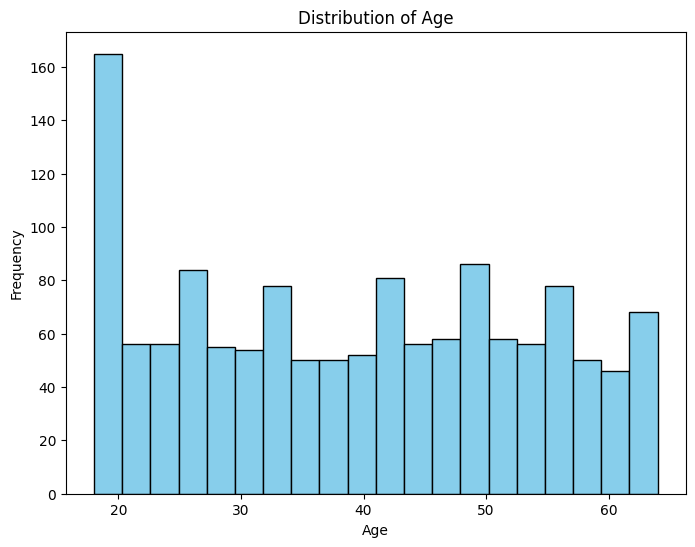

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


To understand the purpose of each line of code, we update the prompt by adding "Explain the code" for clarity on each task.

***Prompt***:

<font size=3 color="navyblue"> Visualize the distribution of age in the data and explain the code.
</font>

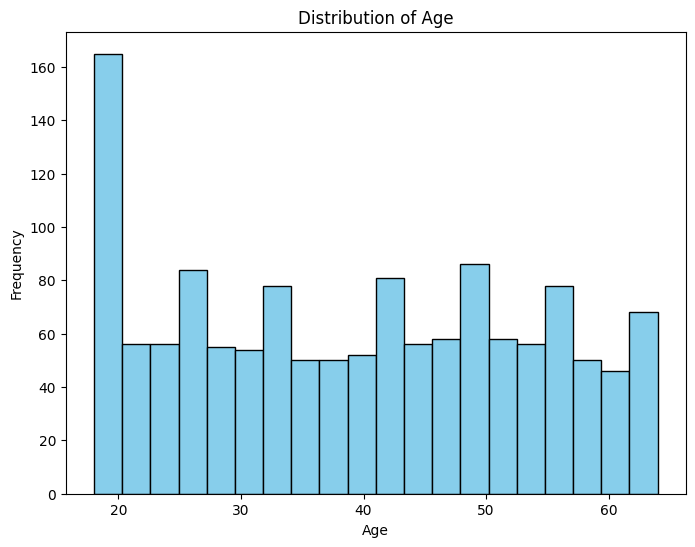

In [14]:
# Create a histogram of the 'age' column
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black') # Create histogram with 20 bins
plt.title('Distribution of Age') # Set the title of the histogram
plt.xlabel('Age') # Set the label for the x-axis
plt.ylabel('Frequency') # Set the label for the y-axis
plt.show() # Display the plot


**Observation**:
- From the chart, we can see that the **higher number of individuals in the lower age brackets** — particularly those around **20 to 25 years old**.
- This suggests that **younger individuals may be more aware of** or have greater access to **insurance** options.

***Prompt***:

<font size=3 color="navyblue">Visualize the distribution of gender in the data.
</font>

- Let’s now check the gender distribution in the
data and assess whether it is balanced.
- A balanced distribution is important to prevent the model from developing a bias towards a particular gender, which can impact the accuracy and generalizability of its predictions.

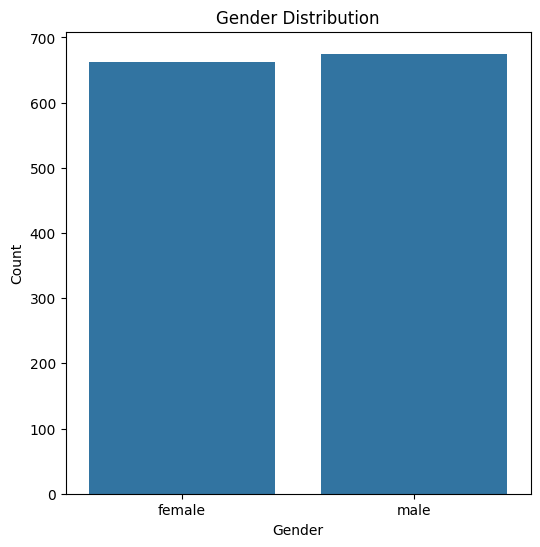

In [15]:
# Check gender distribution to see if the data is balanced.
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Observation**:
- We can see that the gender distribution of the population is nearly balanced between males and females, suggesting equal interest in insurance across genders.

***Prompt***:

<font size=3 color="navyblue"> Visualize the distribution of BMI in the data.
</font>

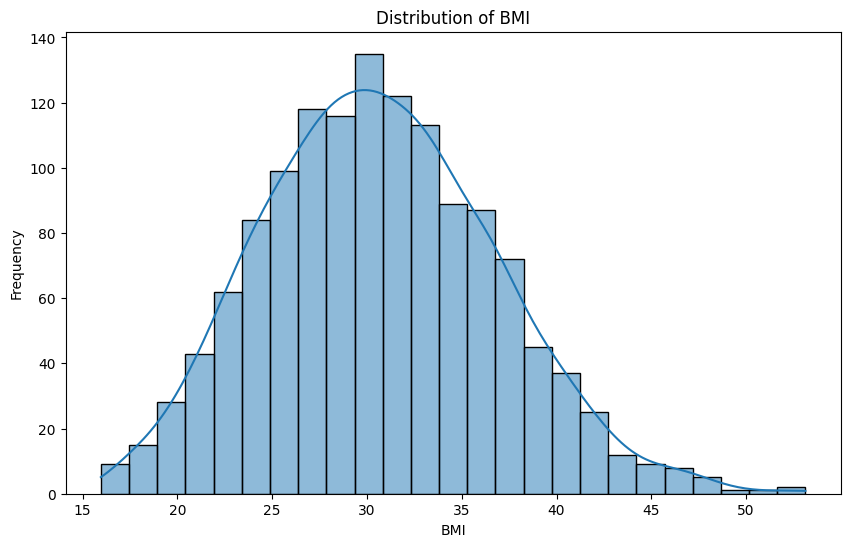

In [16]:
# Analyze how BMI varies across individuals to detect obesity trends.
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


**Observations:**
- The data shows that most of the population has a BMI concentrated around 30, as evidenced by the peak of the distribution curve near this value. The bell-shaped curve with a slight right skew suggests a general trend toward higher body mass, with a few individuals having significantly higher BMI values (above 45), indicating the presence of outliers.


**NOTE** : When we look at the distribution of age, it only shows a simple histogram. But when we check the distribution of BMI, it also adds a smooth curve(kde line) on top of the bars, giving a clearer picture of how the values are spread out. This shows that large language models (LLMs) can generate different types of charts at different times, even for similar tasks, so it's important to clearly specify the kind of chart we want if we're aiming for a specific type of visualization.

***Prompt***:

<font size=3 color="navyblue"> Visualize the distribution of smokers in the data.
</font>

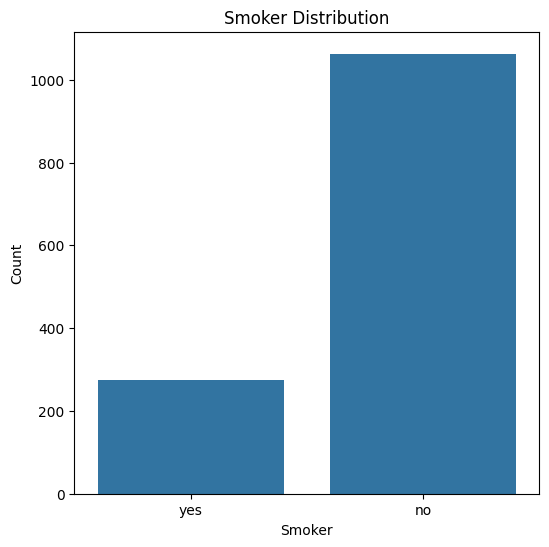

In [17]:
# Visualize the distribution of smokers in the data.
plt.figure(figsize=(6, 6))
sns.countplot(x='smoker', data=data)
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


**Observations:**
- The majority of the population appears to be non-smokers.
- This indicates that smoking status could be a key factor in health insurance assessments.

***Prompt***:

<font size=3 color="navyblue">Visualize the distribution of regions in the data.
</font>

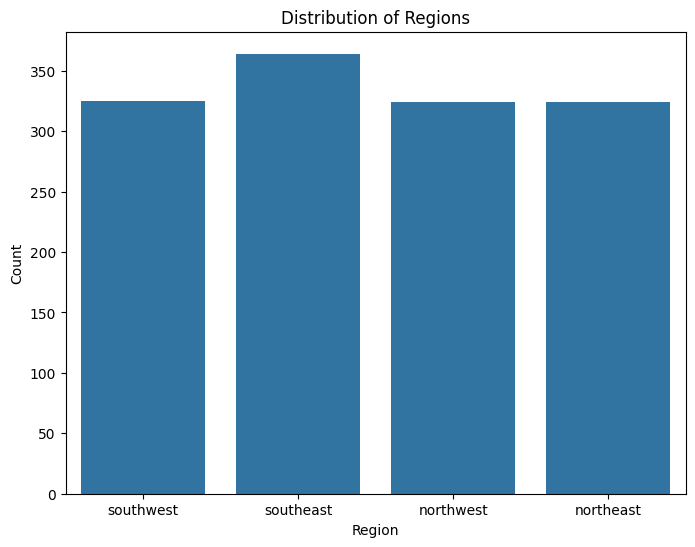

In [18]:
# Visualize the distribution of regions in the data.
plt.figure(figsize=(8, 6))
sns.countplot(x='region', data=data)
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


**Observations:**
- The regional distribution of individuals is relatively balanced, though the southeast has a slightly higher concentration. This suggests potential regional influences that may be important for targeted outreach or service planning.

***Prompt***:

<font size=3 color="navyblue">Visualize the distribution of insurance charges using a box plot.
</font>

**NOTE** : We specifically mention a box plot in the prompt to analyze charges, as it effectively displays the spread, highlights the median, and reveals skewness and outliers.

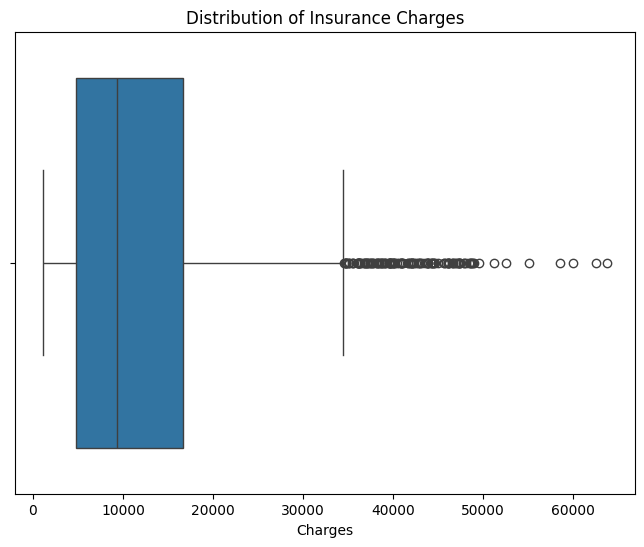

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='charges', data=data)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.show()


**Observations:**
- The boxplot shows that **most insurance charges fall below approximately 20,000**, with the **median around 9,000**. However, there are a **significant number of outliers** beyond 35,000, indicating that some individuals incur **very high medical costs**. This right-skewed distribution suggests a need for special attention to these high-cost cases when building predictive models or setting premium strategies.

## **Bivariate Analysis**

***Prompt***:

<font size=3 color="navyblue">Visualize how insurance charges vary with age.
</font>

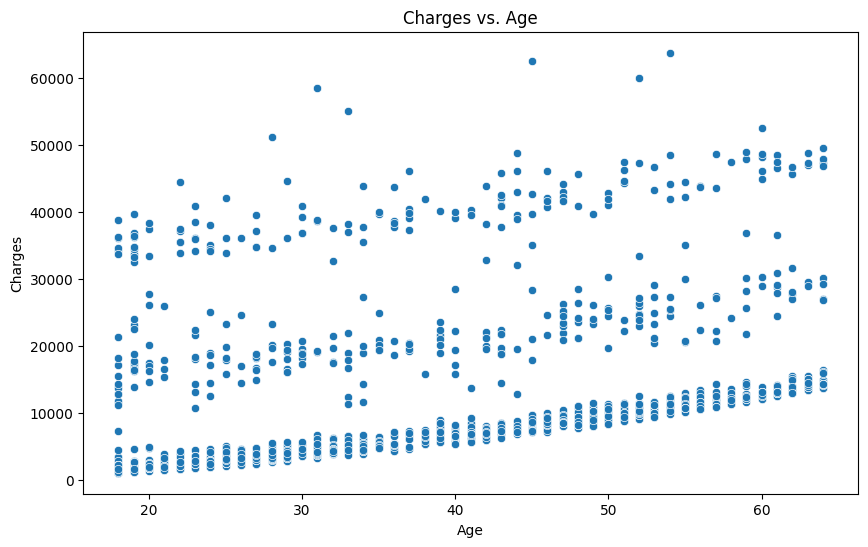

In [20]:
# Create a scatter plot to visualize the relationship between age and charges.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=data)
plt.title('Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


**Observations:**
- Insurance charges generally rise with age, indicating a positive correlation where older individuals tend to incur higher costs.
- The chart suggests the presence of three distinct clusters, possibly indicating different insurance plan

***Prompt***:

<font size=3 color="navyblue">Visualize how insurance charges vary with Smokers.

</font>

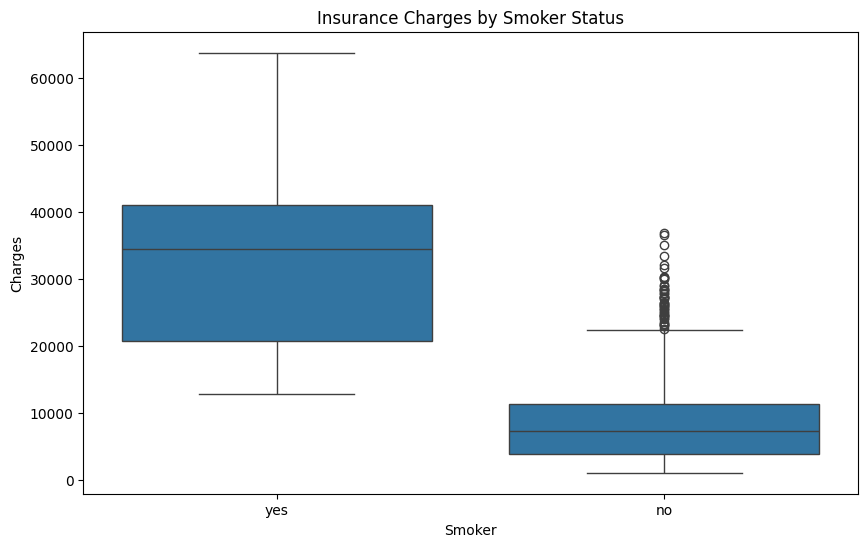

In [21]:
# Compare charges for smokers vs. non-smokers
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Insurance Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


**Observations:**
- The boxplot reveals a **significant difference in insurance charges between smokers and non-smokers**.
- Smokers tend to incur **much higher medical charges**, with a median above 30,000, compared to non-smokers whose median is below 10,000.
- Additionally, the **spread of charges is much wider** for smokers, indicating more variability and higher risk.
- This strong contrast suggests that smoking status is a **critical factor** in determining insurance pricing.

***Prompt***:

<font size=3 color="navyblue">Visualize how insurance charges vary with Gender.

</font>

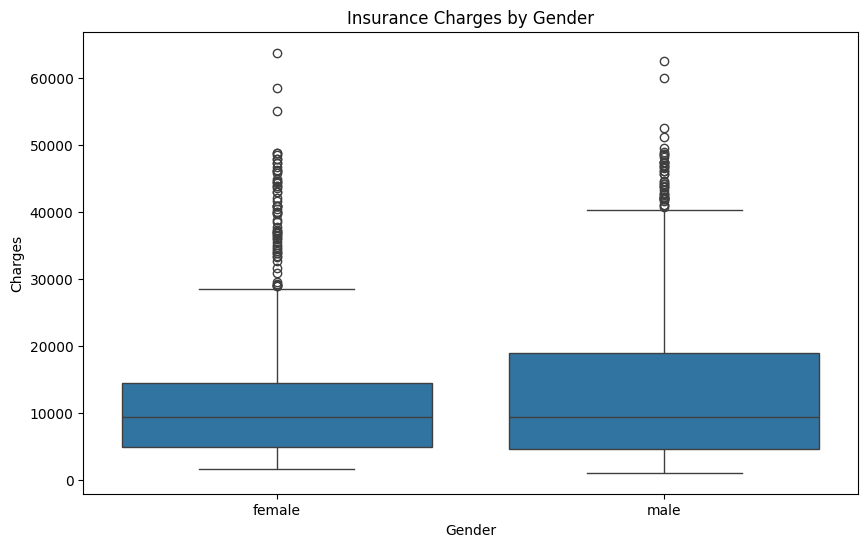

In [22]:
# Analyze if gender affects charges.
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Insurance Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()


**Observations:**
- The box plot shows that males generally face higher and more variable insurance charges than females, suggesting gender may influence insurance pricing.
- This also prompts further investigation into whether other factors like **smoking status** or **BMI** are disproportionately associated with gender, which could be indirectly influencing the observed differences.

***Prompt***:

<font size=3 color="navyblue">Visualize insurance charges across genders (male vs. female), further distinguishing between smokers and non-smokers within each gender using an appropriate chart.

</font>

Compare charges across sex (male and female) and differentiate between smokers and non-smokers within each gender.

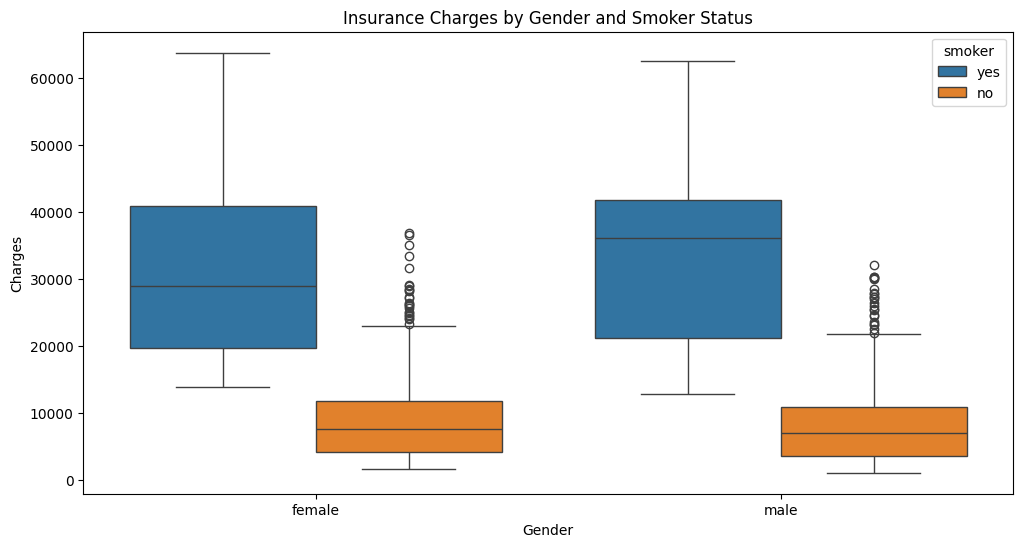

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='charges', hue='smoker', data=data)
plt.title('Insurance Charges by Gender and Smoker Status')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()


**Observations:**
- **Smokers** (both male and female) clearly have **significantly higher insurance charges** compared to non-smokers.
- Among **smokers**, **males** tend to have **slightly higher median charges** than females.
- For **non-smokers**, the distribution is similar across genders, but **male non-smokers show slightly more variability** in charges.


***Prompt***:

<font size=3 color="navyblue">Visualize relationships between numerical features (age, BMI, charges) using a pair plot, with 'smoker' as the hue to observe the influence of smoking status.


</font>

We plot the pair plot to visually explore relationships between key numerical features and see how smoking status affects insurance charges, as we can see a noticeable gap in charges between smokers and non-smokers.

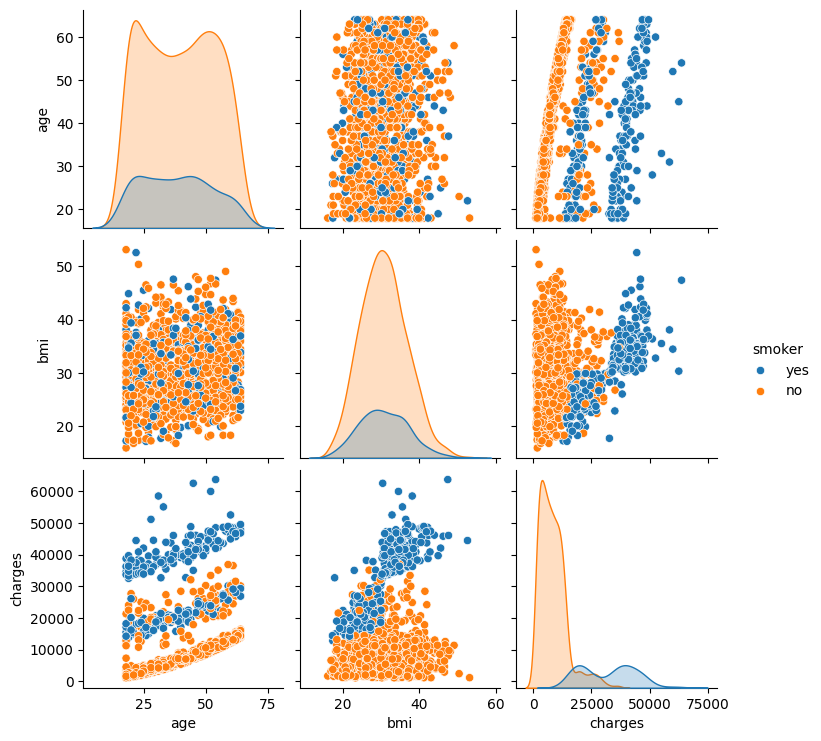

In [24]:
# Create the pair plot
sns.pairplot(data, vars=['age', 'bmi', 'charges'], hue='smoker')
plt.show()


**Observations:**
- **Smokers vs Non-Smokers**:  
   Smokers (orange) have **significantly higher insurance charges** compared to non-smokers (blue), clearly visible in the `charges` vs `bmi` and `charges` vs `age` plots.

- **BMI and Charges**:  
   There's a **positive trend** between BMI and charges, especially among smokers, indicating that higher BMI may lead to higher costs.

- **Age and Charges**:  
   Insurance charges tend to **increase with age**, more prominently for smokers.

- **Distributions**:  
   The age and BMI distributions are **similar across smoker categories**, but charges are **skewed higher for smokers**.

***Prompt***:

<font size=3 color="navyblue"> Visualize how insurance charges vary with No of Childrens.
</font>

Examine if having more children increases insurance charges.

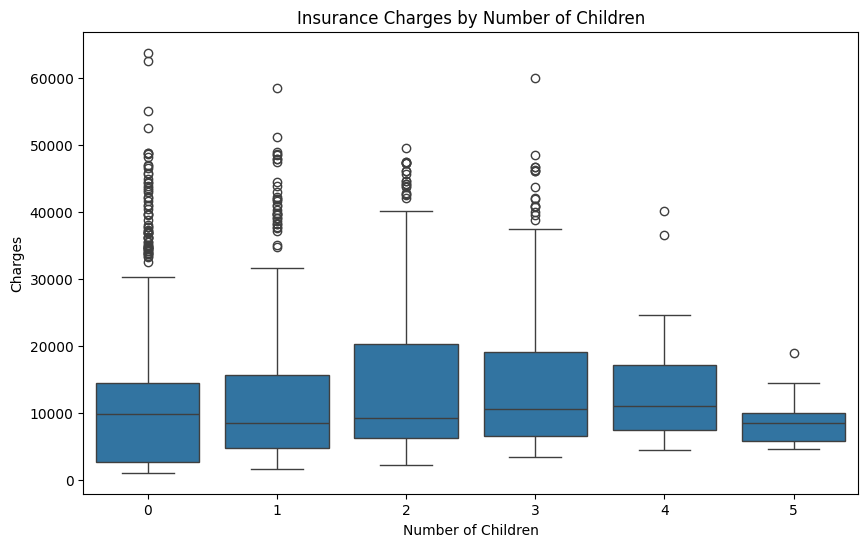

In [25]:
# Analyze if the number of children influences charges.
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=data)
plt.title('Insurance Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()


**Observations:**
- The box plot suggests that insurance charges increase with one or two children but plateau with three or more, indicating a limited impact of family size beyond a certain point.

***Prompt***:

<font size=3 color="navyblue"> Visualize how insurance charges vary with regions.
</font>

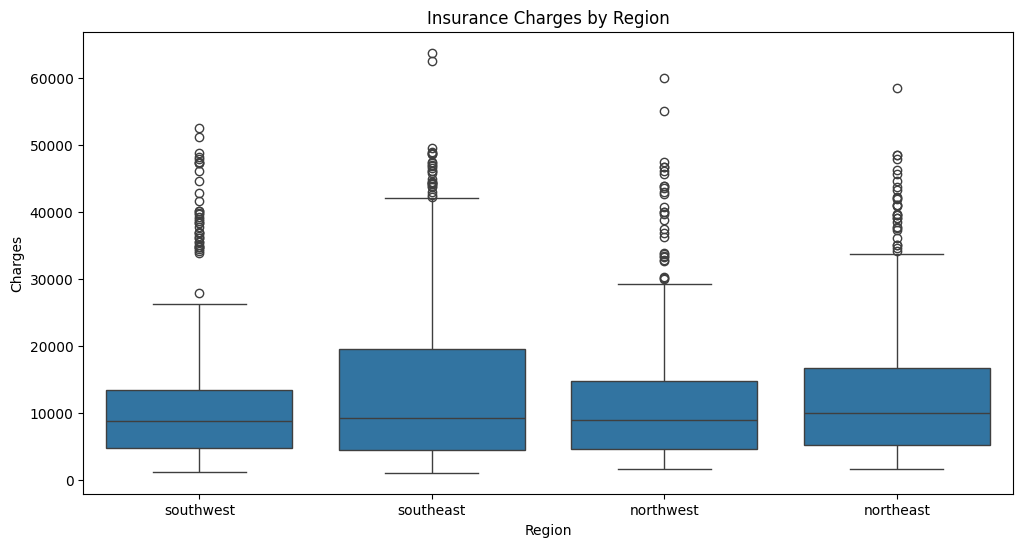

In [26]:
# Analyze regional differences in charges.
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


**Observations:**
- The boxplot shows that insurance charges are fairly consistent across regions, with **similar medians around 10,000**. However, the **Southeast region** stands out with the **widest spread (~15,000)** and a greater number of high-value outliers, suggesting more variability in charges there. Overall, region may not be a strong predictor of insurance cost, but the Southeast might warrant closer examination due to its higher dispersion.

***Prompt***:

<font size=3 color="navyblue"> Visualize the numerical columns using a heatmap.

</font>

We check the heatmap to interpret how strongly different features are related to the target variable and identify which factors may influence it the most.


This is a **correlation heatmap**, which shows how strongly numerical variables are related to each other.

- The values range from **-1 to 1**:
  - **1** means a **perfect positive relationship** (as one goes up, the other goes up).
  - **0** means **no relationship**.
  - **-1** means a **perfect negative relationship** (as one goes up, the other goes down).


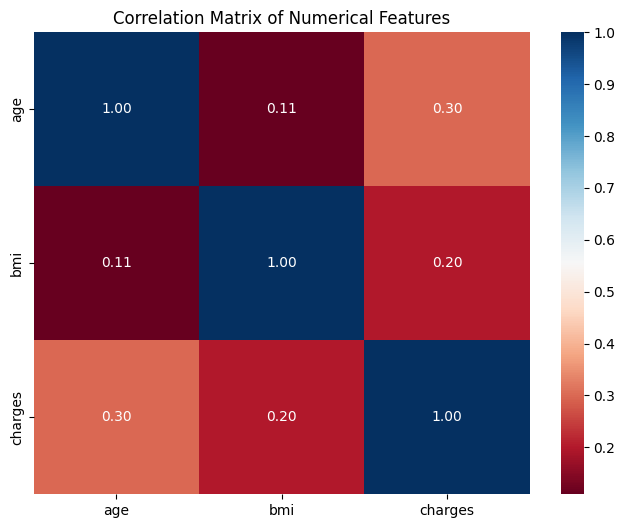

In [27]:
# Create a correlation matrix for numerical features
numerical_cols = ['age', 'bmi', 'charges']
correlation_matrix = data[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**Observatios:**

- **Age vs Charges (0.30)**:  
   There’s a **moderate positive correlation**. This means that as people get older, their insurance charges tend to increase.

- **BMI vs Charges (0.20)**:  
   There’s a **weak positive correlation**. Higher BMI might lead to higher insurance charges, but the relationship isn't very strong.

- **Age vs BMI (0.11)**:  
   Almost **no correlation** — a person’s age doesn't really tell us much about their BMI.


# **Data Preprocessing**

To begin, we aim to build three linear regression models:

1. In the first model, we use only the **Age** column to build a **Simple Linear Regression** model.
2. In the second model, we use only the **numerical variables (Age, BMI)** to build a **Multiple Linear Regression** model.
3. Third using **all variables**, including **categorical features**

Before we can include categorical data in the model, we need to **encode** these variables into a numerical format. Machine learning algorithms require numerical input, so categorical features (such as `sex`, `smoker`, or `region`) are typically transformed using techniques like **one-hot encoding** or **dummy encoding**.

Once the data is properly prepared, we **split it into training and testing sets**. This is a critical step to ensure we can evaluate how well the model performs on unseen data. Typically, **70–80%** of the data is used for training, while the remaining **20–30%** is used for testing.

This process sets the foundation for building robust regression models and ensures that we can fairly assess their predictive performance.


### Encode the Data

***Prompt***:

<font size=3 color="navyblue">Dummy encode the 'sex', 'smoker', and 'region' columns in the data using dtype=int
</font>

**NOTE :** We use **dtype=int** in dummy encoding to guarantee that the output is numerical (0 and 1), as it may otherwise default to Boolean values (True and False).

In [28]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=int)


We check the DataFrame to verify whether the data has been encoded correctly.

***Prompt***:

<font size=3 color="navyblue">Show the first 10 rows of the data.


</font>

In [29]:
data.head(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,1,0,0
8,37,29.830,2,6406.41070,1,0,0,0,0
9,60,25.840,0,28923.13692,0,0,1,0,0


### Train Test Split

***Prompt***:

<font size=3 color="navyblue">Split the data into training and testing sets, using `Charges` as the dependent variable (`y`). Use 70% of the data for training and 30% for testing.


</font>

In [30]:
# Split data into features (X) and target (y)
X = data.drop('charges', axis=1)
y = data['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


***Prompt***:

<font size=3 color="navyblue">Check the shape of the training and testing data.
</font>

In [31]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (935, 8)
X_test shape: (402, 8)
y_train shape: (935,)
y_test shape: (402,)


The training and testing datasets are properly split, with approximately 70% of the data used for training and 30% for testing.

# **Model Building**

## Model Evaluation Criterion

In insurance price prediction, the model can make two types of mistakes:

* **Underestimating the price** – when the predicted premium is lower than it should be
* **Overestimating the price** – when the predicted premium is higher than the actual value

While both errors matter, **underestimating the price** is usually more serious. It can result in the company charging too little, which may lead to financial losses.

**So, how can we reduce this risk?**

To make the model more reliable, the goal should be to:

* **Maximize R²** (coefficient of determination), which tells us how well the model explains the variation in prices
* **Minimize MSE** (Mean Squared Error), which measures how close the predictions are to the actual values

By focusing on improving both these metrics, we can build a more accurate model that helps price insurance more effectively and reduce the chances of financial loss.


## Model Building

With the data preprocessed and ready, we begin our modeling phase using **Linear Regression**, a foundational and interpretable algorithm for predicting continuous outcomes.

Linear Regression assumes a linear relationship between the input features and the target variable in this case, **insurance charges**. It attempts to fit the best possible straight line through the data that minimizes the difference between the predicted and actual values.

**Model Training**

We train the linear regression model on our training dataset, allowing it to learn the relationship between the independent variables (like age, BMI, smoker status, etc.) and the dependent variable (charges).


First, we create a blank DataFrame to store the training and testing metrics of different models.

***Prompt***:

<font size=3 color="navyblue">Create a blank DataFrame named model_eval_results to store the performance results of different models on the training and testing sets.
</font>

In [32]:
# prompt: Create a blank DataFrame named model_eval_results to store the performance results of different models on the training and testing sets.

model_eval_results = pd.DataFrame(columns=['Model', 'Train_MSE', 'Train_R2', 'Test_MSE', 'Test_R2'])

### Model 1

In the first model, we use only the `age` feature to demonstrate how simple linear regression works and how it performs.

***Prompt***:

<font size=3 color="navyblue">Train a linear regression model using age as feature and charges as the dependent column.

</font>

In [33]:
# Define features (X) and target (y) for Model 1 (Age only)
X_train_m1 = X_train[['age']]
X_test_m1 = X_test[['age']]

# Initialize and train the Linear Regression model
model_1 = LinearRegression()
model_1.fit(X_train_m1, y_train)

LinearRegression()

***Prompt***:

<font size=3 color="navyblue">Display the linear regression equation.

</font>

In [34]:
print(f'Linear Regression Equation: Charges = {model_1.intercept_:.2f} + ({model_1.coef_[0]:.2f} * Age)')

Linear Regression Equation: Charges = 3718.81 + (238.82 * Age)


- Based on the above equation, we can say that insurance premium charges increase as the age of the customer increases.

- It's important to note that it's important to check if the assumptions of linear regression are satisfied before we can make a proper inference from the model coefficients.
    - While the assumptions are out of the scope of the program, you can refer to the reference material of the week in case you're interested in exploring further.

Now, let's evaluate the model's performance.

***Prompt***:

<font size=3 color="navyblue">Evaluate the model’s performance on both the training and testing data, add it to model_eval_results, and display the results.


</font>

In [35]:
# prompt: Evaluate the model’s performance on both the training and testing data, add it to model_eval_results, and display the results

# Predict on training and testing data
y_train_pred_m1 = model_1.predict(X_train_m1)
y_test_pred_m1 = model_1.predict(X_test_m1)

# Calculate MSE and R2 for training data
train_mse_m1 = mean_squared_error(y_train, y_train_pred_m1)
train_r2_m1 = r2_score(y_train, y_train_pred_m1)

# Calculate MSE and R2 for testing data
test_mse_m1 = mean_squared_error(y_test, y_test_pred_m1)
test_r2_m1 = r2_score(y_test, y_test_pred_m1)

# Add results to the DataFrame
model_eval_results.loc[len(model_eval_results)] = ['Model 1 (Age Only)', train_mse_m1, train_r2_m1, test_mse_m1, test_r2_m1]

# Display the results
model_eval_results


,Model,Train_MSE,Train_R2,Test_MSE,Test_R2
0,Model 1 (Age Only),1.246248e+08,0.082229,1.545219e+08,0.096985


- The error is high and the R-squared value is low for both the training and testing datasets, indicating poor model performance and underfitting.
- This is likely due to the use of only a single feature and a simple linear model.

### Model 2

In the second model, we use only the numerical features to train a multiple linear regression model, and evaluate how well the model performs.

***Prompt***:

<font size=3 color="navyblue">Train a linear regression model using age and BMI as features, and charges as the dependent column.

</font>

In [36]:
# Define features (X) and target (y) for Model 2 (Age and BMI)
X_train_m2 = X_train[['age', 'bmi']]
X_test_m2 = X_test[['age', 'bmi']]

# Initialize and train the Linear Regression model
model_2 = LinearRegression()
model_2.fit(X_train_m2, y_train)

LinearRegression()

***Prompt***:

<font size=3 color="navyblue">Display the linear regression equation.

</font>

In [37]:
print(f'Linear Regression Equation: Charges = {model_2.intercept_:.2f} + ({model_2.coef_[0]:.2f} * Age) + ({model_2.coef_[1]:.2f} * BMI)')


Linear Regression Equation: Charges = -3641.79 + (227.40 * Age) + (254.94 * BMI)


- Based on the above equation, we can say that insurance premium charges increase as the BMI of the customer increases, provided that the age is held constant.

- It's important to note that it's important to check if the assumptions of linear regression are satisfied before we can make a proper inference from the model coefficients.
    - While the assumptions are out of the scope of the program, you can refer to the reference material of the week in case you're interested in exploring further.

Now, let's check the model's performance.

***Prompt***:

<font size=3 color="navyblue">Evaluate the model’s performance on both the training and testing data, add it to model_eval_results, and display the results.


</font>

In [38]:
# prompt: Evaluate the model’s performance on both the training and testing data, add it to model_eval_results, and display the results.

# Predict on training and testing data
y_train_pred_m2 = model_2.predict(X_train_m2)
y_test_pred_m2 = model_2.predict(X_test_m2)

# Calculate MSE and R2 for training data
train_mse_m2 = mean_squared_error(y_train, y_train_pred_m2)
train_r2_m2 = r2_score(y_train, y_train_pred_m2)

# Calculate MSE and R2 for testing data
test_mse_m2 = mean_squared_error(y_test, y_test_pred_m2)
test_r2_m2 = r2_score(y_test, y_test_pred_m2)

# Add results to the DataFrame
model_eval_results.loc[len(model_eval_results)] = ['Model 2 (Age and BMI)', train_mse_m2, train_r2_m2, test_mse_m2, test_r2_m2]

# Display the results
model_eval_results

,Model,Train_MSE,Train_R2,Test_MSE,Test_R2
0,Model 1 (Age Only),1.246248e+08,0.082229,1.545219e+08,0.096985
1,Model 2 (Age and BMI),1.222942e+08,0.099392,1.471034e+08,0.140338


- The error has reduced slightly, but is still high, and the R-squared value is low for both the training and testing data, indicating that the model is still performing poorly and **underfitting**.


### Model 3

Now, we use the whole dataset, including both numerical and categorical features, to build our multiple linear regression model, and see how the model performs with all available information.

***Prompt***:

<font size=3 color="navyblue">Train a linear regression model using all features, and charges as the dependent column.


</font>

In [39]:
# Initialize and train the Linear Regression model on the whole data
model_3 = LinearRegression()
model_3.fit(X_train, y_train)

LinearRegression()

***Prompt***:

<font size=3 color="navyblue">Display the linear regression equation.

</font>

In [40]:
# Construct the equation string
equation = f'Charges = {model_3.intercept_:.2f}'
for i, col in enumerate(X_train.columns):
    equation += f' + ({model_3.coef_[i]:.2f} * {col})'

print(f'Linear Regression Equation: {equation}')

Linear Regression Equation: Charges = -11516.78 + (251.25 * age) + (328.38 * bmi) + (522.16 * children) + (-111.91 * sex_male) + (22874.45 * smoker_yes) + (-465.75 * region_northwest) + (-936.10 * region_southeast) + (-765.58 * region_southwest)


***Prompt***:

<font size=3 color="navyblue">Evaluate the model’s performance on both the training and testing data, add it to model_eval_results, and display the results.

</font>

In [41]:
# prompt: Evaluate the model’s performance on both the training and testing data, add it to model_eval_results, and display the results.

# Predict on training and testing data
y_train_pred_m3 = model_3.predict(X_train)
y_test_pred_m3 = model_3.predict(X_test)

# Calculate MSE and R2 for training data
train_mse_m3 = mean_squared_error(y_train, y_train_pred_m3)
train_r2_m3 = r2_score(y_train, y_train_pred_m3)

# Calculate MSE and R2 for testing data
test_mse_m3 = mean_squared_error(y_test, y_test_pred_m3)
test_r2_m3 = r2_score(y_test, y_test_pred_m3)

# Add results to the DataFrame
model_eval_results.loc[len(model_eval_results)] = ['Model 3 (All Features)', train_mse_m3, train_r2_m3, test_mse_m3, test_r2_m3]

# Display the results
model_eval_results

,Model,Train_MSE,Train_R2,Test_MSE,Test_R2
0,Model 1 (Age Only),1.246248e+08,0.082229,1.545219e+08,0.096985
1,Model 2 (Age and BMI),1.222942e+08,0.099392,1.471034e+08,0.140338
2,Model 3 (All Features),3.581293e+07,0.736264,3.894017e+07,0.772436


- The training and testing R-squared values are close (0.736 and 0.772), with MSE values similarly close, indicating the model is generalizing well, **not overfitting**, and performing well on unseen data.

## Model Comparison and Final Model Selecttion

***Prompt***:

<font size=3 color="navyblue">Show the model evaluation metrics in `model_eval_results`.

</font>

In [42]:
model_eval_results

,Model,Train_MSE,Train_R2,Test_MSE,Test_R2
0,Model 1 (Age Only),1.246248e+08,0.082229,1.545219e+08,0.096985
1,Model 2 (Age and BMI),1.222942e+08,0.099392,1.471034e+08,0.140338
2,Model 3 (All Features),3.581293e+07,0.736264,3.894017e+07,0.772436


As we progress from Model 1 to Model 3, we observe a significant improvement in performance:

* **Model 1 (Age)** uses only a single feature and performs the worst, with a very high error and low R² values.
* **Model 2 (Age + BMI)** slightly improves both error and R², but still underperforms.
* **Model 3 (All Features)** shows a **drastic reduction in error** and a **substantial increase in R²**, indicating that it explains a much higher proportion of the variance in the target variable.

**Therefore, Model 3, which incorporates all available features, is the best performing model. It is selected as the final model due to its significantly better predictive accuracy and model fit.**

# **Business Recommendation**

1. **Targeted Premium Adjustments**  
   - Implement tiered pricing based on **age** and **BMI** to reflect varying risk levels more accurately.

2. **Smoking Cessation Incentives**  
   - Given the significant impact of smoking on insurance costs, consider offering discounts or wellness incentives to support non-smoking behavior and encourage a broader base of lower-risk customers.

3. **Wellness Programs**  
   - Introduce health programs to help policyholders manage BMI, which could lower both their charges and the company’s risk exposure.

4. **Region-Specific Strategies**  
   - Explore regional pricing only if operational costs or risk profiles justify it; otherwise, standard pricing may suffice.

5. **Marketing Focus**  
   - Target low-risk demographics—such as younger individuals, non-smokers, and those with healthy BMI—for affordable premium plans, while offering personalized support and coverage options for higher-risk segments.

<font size=6 color="navyblue">Power Ahead!</font>
___